In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = np.genfromtxt('perceptron/person.txt')

/Users/balint/.graphlab/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


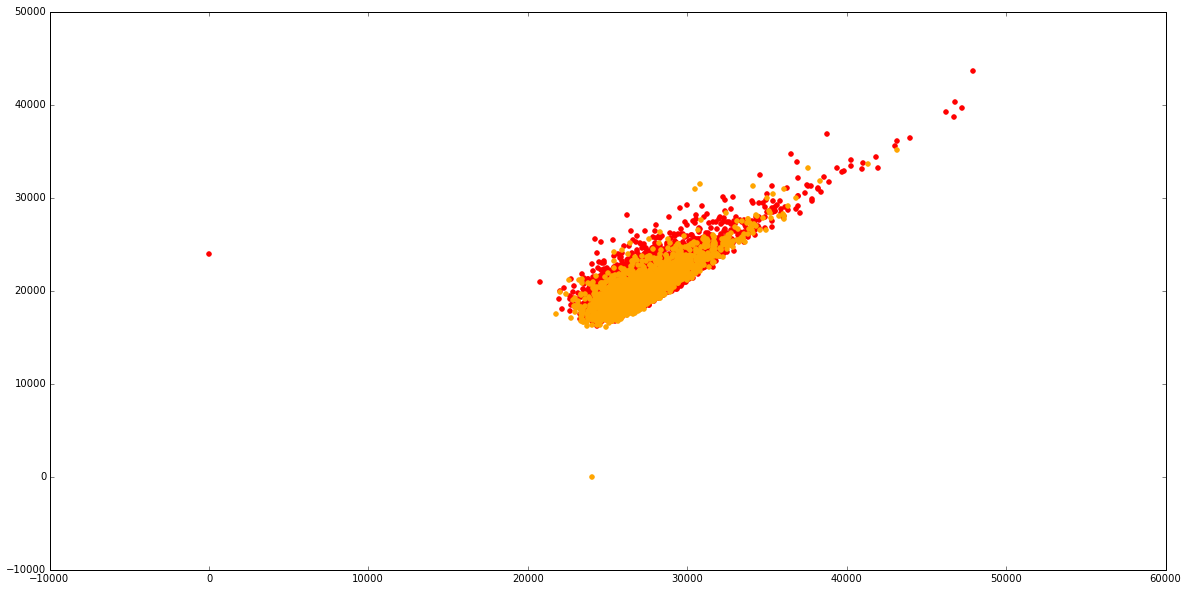

In [3]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(data[data[:,0]==0][:,1],data[data[:,0]==0][:,2],color='red')
plt.scatter(data[data[:,0]==1][:,1],data[data[:,0]==1][:,2],color='orange')

In [4]:
from sklearn import ensemble as ens
from sklearn import metrics as met
from sklearn import linear_model as lin

In [5]:
data.shape

(7818, 21)

In [6]:
tr_size=200

idx = np.random.permutation(len(data))

train = data[idx[:tr_size]]
test = data[idx[tr_size:]]

In [7]:
cf = lin.LogisticRegression(solver='newton-cg')
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

0.643156463642


/Users/balint/.graphlab/anaconda/lib/python2.7/site-packages/sklearn/utils/optimize.py:149: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [8]:
cf = ens.AdaBoostClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)
cf = ens.AdaBoostClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)
cf = ens.AdaBoostClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.decision_function(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred)
print(auc)

0.619176719024
0.594972632635
0.628004053901


In [9]:
cf = ens.RandomForestClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.RandomForestClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.RandomForestClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)

0.607215838465
0.633773129838
0.595307503249


In [10]:
cf = ens.GradientBoostingClassifier()
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.GradientBoostingClassifier(n_estimators=1000)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)
cf = ens.GradientBoostingClassifier(n_estimators=10)
cf.fit(train[:,1:],train[:,0])
pred = cf.predict_proba(test[:,1:])
auc = met.roc_auc_score(test[:,0],pred[:,1])
print(auc)

0.622269407876
0.60872581078
0.636402233177


In [11]:
auc=np.zeros(100)
for i in range(100):
    cf = ens.AdaBoostClassifier(n_estimators=(i+1)*10)
    cf.fit(train[:,1:],train[:,0])
    pred = cf.decision_function(test[:,1:])
    auc[i] = met.roc_auc_score(test[:,0],pred)

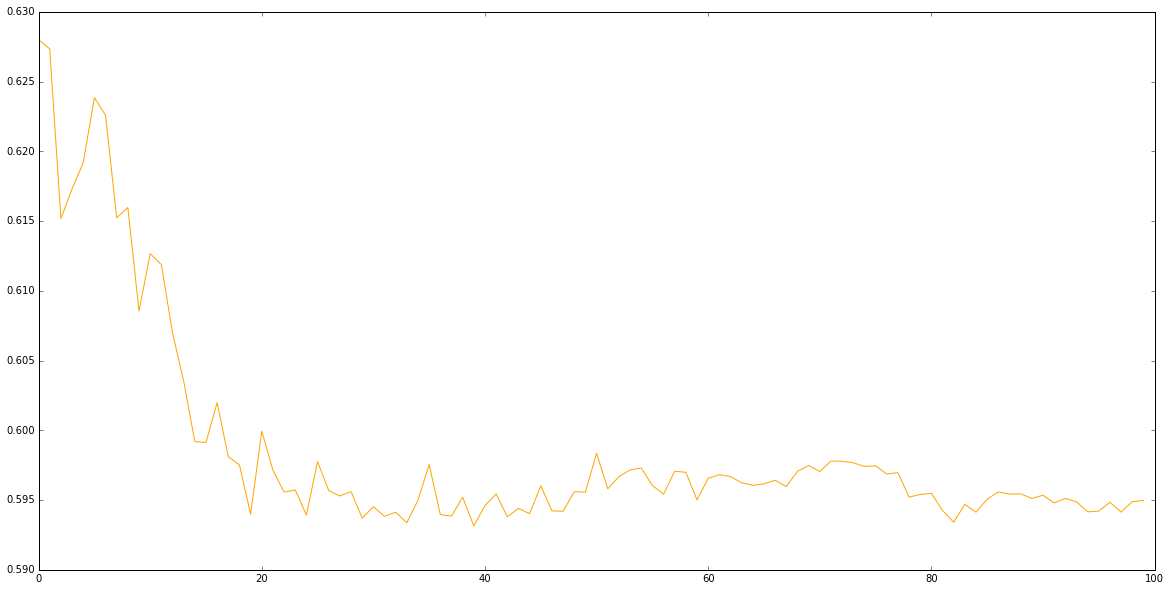

In [12]:
plt.figure(figsize=(20,10),dpi=300)
plt.plot(auc,color='orange')
plt.show()